# Seoul Bike Sharing Demand Data Set Exploration
## by Mohamed Salah Helal

## Preliminary Wrangling

The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall) and the number of bikes rented per hour and date information in the city of Seoul. I am going to visualize and explain the most effective factors on rent bike count.
#

    Attribute Information:

    Date - year-month-day
    Rented Bike count - Count of bikes rented at each hour
    Hour - Hour of he day
    Temperature-Temperature in Celsius
    Humidity - %
    Windspeed - m/s
    Visibility - 10m
    Dew point temperature - Celsius
    Solar radiation - MJ/m2
    Rainfall - mm
    Snowfall - cm
    Seasons - Winter, Spring, Summer, Autumn
    Holiday - Holiday/No holiday
    Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

#
Dataset source:
[https://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand](https://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand)



In [81]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from chardet import detect

%matplotlib inline

In [82]:
# get file encoding type
def get_encoding_type(file):
    with open(file, 'rb') as f:
        rawdata = f.read()
    return detect(rawdata)['encoding']

get_encoding_type('SeoulBikeData.csv')

'ISO-8859-1'

In [83]:
df=pd.read_csv('SeoulBikeData.csv', encoding='ISO-8859-1')
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [85]:
df[df['Functioning Day'] == 'No'][['Functioning Day', 'Rented Bike Count']]

,Functioning Day,Rented Bike Count
3144,No,0
3145,No,0
3146,No,0
3147,No,0
3148,No,0
...,...,...
8251,No,0
8252,No,0
8253,No,0
8254,No,0


C:\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Functioning Day', ylabel='count'>

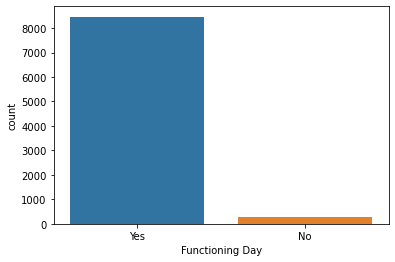

In [86]:
sb.countplot(df['Functioning Day'])

## We can see that there is no bike rents at non functioning days as the rent company is off service, so we should drop these records from our data.

In [87]:
# # drop non functioning days
# df = df[df['Functioning Day'] == 'Yes']
# df

In [88]:
# check the correlation between features and target

pd.DataFrame(df.corr().unstack().sort_values(ascending=False)['Rented Bike Count'],columns=['Correlation'])

,Correlation
Rented Bike Count,1.000000
Temperature(°C),0.538558
Hour,0.410257
Dew point temperature(°C),0.379788
Solar Radiation (MJ/m2),0.261837
Visibility (10m),0.199280
Wind speed (m/s),0.121108
Rainfall(mm),-0.123074
Snowfall (cm),-0.141804
Humidity(%),-0.199780


In [89]:
# drop some less important columns

df.drop(columns=['Dew point temperature(°C)','Wind speed (m/s)', 'Humidity(%)', 'Visibility (10m)', 'Rainfall(mm)', 'Snowfall (cm)'], inplace=True)

In [90]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Seasons', 'Holiday', 'Functioning Day'],
      dtype='object')

In [91]:
# rename columns

df.columns = ['date', 'bikeCount', 'hour', 'temperature',
       'solarRadiation', 'seasons', 'holiday', 'functioningDay']

In [92]:
# converting date to get year, month, day and day of week

df["date"]=pd.to_datetime(df["date"],format="%d/%m/%Y") 
df["month"]=df["date"].dt.month
df["day"]=df["date"].dt.day
df["year"]=df["date"].dt.year
df['weekDay'] = df['date'].dt.weekday

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['weekDay'] = df.weekDay.apply(lambda x:days[x])

In [93]:
df

,date,bikeCount,hour,temperature,solarRadiation,seasons,holiday,functioningDay,month,day,year,weekDay
0,2017-12-01,254,0,-5.2,0.0,Winter,No Holiday,Yes,12,1,2017,Friday
1,2017-12-01,204,1,-5.5,0.0,Winter,No Holiday,Yes,12,1,2017,Friday
2,2017-12-01,173,2,-6.0,0.0,Winter,No Holiday,Yes,12,1,2017,Friday
3,2017-12-01,107,3,-6.2,0.0,Winter,No Holiday,Yes,12,1,2017,Friday
4,2017-12-01,78,4,-6.0,0.0,Winter,No Holiday,Yes,12,1,2017,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,0.0,Autumn,No Holiday,Yes,11,30,2018,Friday
8756,2018-11-30,764,20,3.4,0.0,Autumn,No Holiday,Yes,11,30,2018,Friday
8757,2018-11-30,694,21,2.6,0.0,Autumn,No Holiday,Yes,11,30,2018,Friday
8758,2018-11-30,712,22,2.1,0.0,Autumn,No Holiday,Yes,11,30,2018,Friday


In [94]:
df.bikeCount[df.functioningDay=='No']

3144    0
3145    0
3146    0
3147    0
3148    0
       ..
8251    0
8252    0
8253    0
8254    0
8255    0
Name: bikeCount, Length: 295, dtype: int64

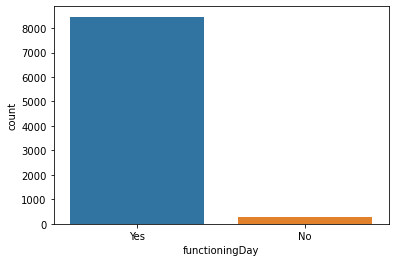

In [95]:
sb.countplot(data= df, x='functioningDay');

<AxesSubplot:xlabel='weekDay', ylabel='bikeCount'>

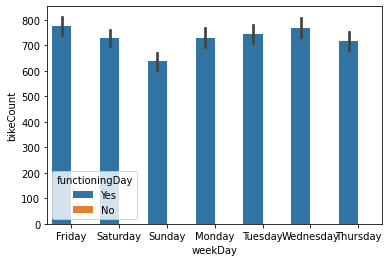

In [96]:
sb.barplot(data=df, x=df.weekDay, y=df.bikeCount, hue=df.functioningDay)


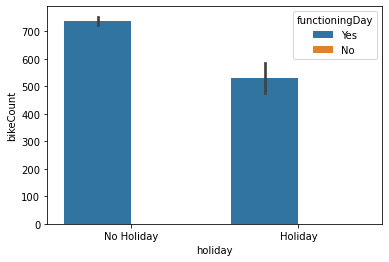

In [97]:
sb.barplot(data=df, x='holiday', y='bikeCount', hue='functioningDay');

In [98]:
df.isnull().sum()

date              0
bikeCount         0
hour              0
temperature       0
solarRadiation    0
seasons           0
holiday           0
functioningDay    0
month             0
day               0
year              0
weekDay           0
dtype: int64

In [99]:
df.duplicated().sum()

0

### No missing values and no duplicates.

In [108]:
# drop non functioning days
df = df[df.functioningDay == 'Yes']
df

,date,bikeCount,hour,temperature,solarRadiation,seasons,holiday,functioningDay,month,day,year,weekDay,noRadiation
0,2017-12-01,254,0,-5.2,0.0,Winter,No Holiday,Yes,12,1,2017,Friday,True
1,2017-12-01,204,1,-5.5,0.0,Winter,No Holiday,Yes,12,1,2017,Friday,True
2,2017-12-01,173,2,-6.0,0.0,Winter,No Holiday,Yes,12,1,2017,Friday,True
3,2017-12-01,107,3,-6.2,0.0,Winter,No Holiday,Yes,12,1,2017,Friday,True
4,2017-12-01,78,4,-6.0,0.0,Winter,No Holiday,Yes,12,1,2017,Friday,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,0.0,Autumn,No Holiday,Yes,11,30,2018,Friday,True
8756,2018-11-30,764,20,3.4,0.0,Autumn,No Holiday,Yes,11,30,2018,Friday,True
8757,2018-11-30,694,21,2.6,0.0,Autumn,No Holiday,Yes,11,30,2018,Friday,True
8758,2018-11-30,712,22,2.1,0.0,Autumn,No Holiday,Yes,11,30,2018,Friday,True


In [100]:
df.columns

Index(['date', 'bikeCount', 'hour', 'temperature', 'solarRadiation', 'seasons',
       'holiday', 'functioningDay', 'month', 'day', 'year', 'weekDay'],
      dtype='object')

### What is the structure of your dataset?

The dataset consists of 8760 rows and 14 columns as follows:
#
    0   Date                       8760 non-null   object 
    1   Rented Bike Count          8760 non-null   int64  
    2   Hour                       8760 non-null   int64  
    3   Temperature(°C)            8760 non-null   float64
    4   Humidity(%)                8760 non-null   int64  
    5   Wind speed (m/s)           8760 non-null   float64
    6   Visibility (10m)           8760 non-null   int64  
    7   Dew point temperature(°C)  8760 non-null   float64
    8   Solar Radiation (MJ/m2)    8760 non-null   float64
    9   Rainfall(mm)               8760 non-null   float64
    10  Snowfall (cm)              8760 non-null   float64
    11  Seasons                    8760 non-null   object 
    12  Holiday                    8760 non-null   object 
    13  Functioning Day            8760 non-null   object  

### What is/are the main feature(s) of interest in your dataset?

Rented Bike Count

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Date, Hour, Temperature ,Solar Radiation, Seasons, Holiday

## Univariate Exploration

Text(0.5, 1.0, '')

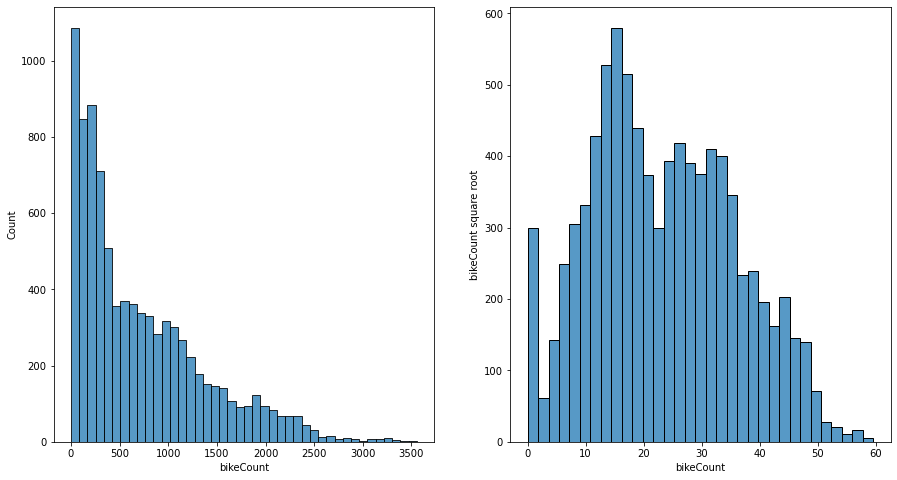

In [101]:
fig, axs = plt.subplots(1,2, figsize=(15,8));

sb.histplot(df.bikeCount, ax=axs[0]);
plt.title('')
sb.histplot(np.sqrt(df.bikeCount), ax=axs[1]);
plt.ylabel('bikeCount square root');
plt.title('')

The bikeCount distribution seems to be exponential, I performed square root transformation to get a more normal shape out of it.

Text(0.5, 1.0, '')

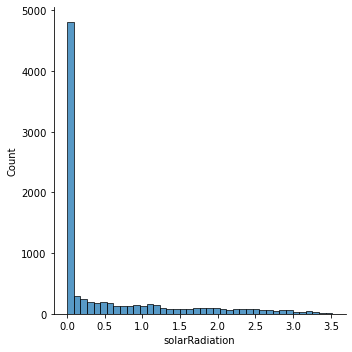

In [102]:
sb.displot(df.solarRadiation)
plt.title('')

The solarRadiation distribution is dominated by near zero values and looks very bad, so I will check the distribution of the data without these zero values and add another column 'noRaidiation' to be true if the solar radiation is zero

In [103]:
df.solarRadiation.value_counts()

0.00    4300
0.01     128
0.02      82
0.03      69
0.06      61
        ... 
3.38       1
2.97       1
3.44       1
3.49       1
3.45       1
Name: solarRadiation, Length: 345, dtype: int64

### As we see, the zeros are dominating the column, let's plot the column distribution without zeros

In [104]:
df['noRadiation'] = df.solarRadiation < .02
df.head()

,date,bikeCount,hour,temperature,solarRadiation,seasons,holiday,functioningDay,month,day,year,weekDay,noRadiation
0,2017-12-01,254,0,-5.2,0.0,Winter,No Holiday,Yes,12,1,2017,Friday,True
1,2017-12-01,204,1,-5.5,0.0,Winter,No Holiday,Yes,12,1,2017,Friday,True
2,2017-12-01,173,2,-6.0,0.0,Winter,No Holiday,Yes,12,1,2017,Friday,True
3,2017-12-01,107,3,-6.2,0.0,Winter,No Holiday,Yes,12,1,2017,Friday,True
4,2017-12-01,78,4,-6.0,0.0,Winter,No Holiday,Yes,12,1,2017,Friday,True


Text(0.5, 1.0, '')

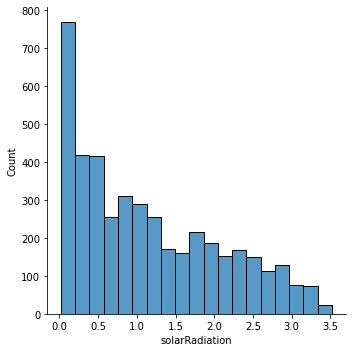

In [105]:
sb.displot(df.solarRadiation[df.noRadiation == False])
plt.title('')

Now the distribution of the solarRadiation looks more clear, it seems to be right skewed.

Text(0.5, 1.0, '')

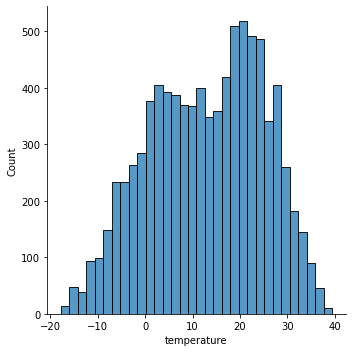

In [106]:
sb.displot(df.temperature)
plt.title('')

In [111]:
df.seasons.value_counts()

Summer    2208
Winter    2160
Spring    2160
Autumn    1937
Name: seasons, dtype: int64

<AxesSubplot:>

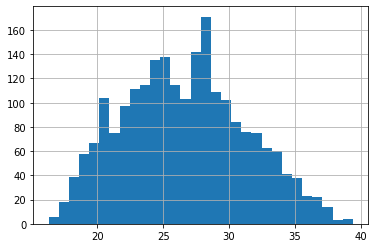

In [114]:
df.temperature[df.seasons=='Summer'].hist(bins=30)

<AxesSubplot:>

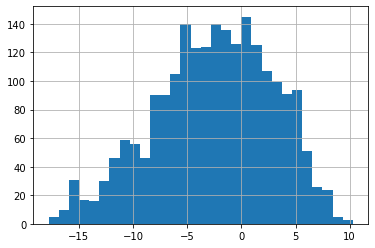

In [115]:
df.temperature[df.seasons=='Winter'].hist(bins=30)

<AxesSubplot:>

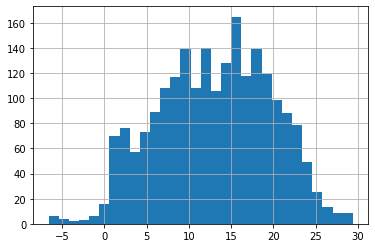

In [116]:
df.temperature[df.seasons=='Spring'].hist(bins=30)

<AxesSubplot:>

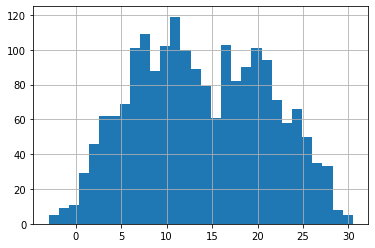

In [118]:
df.temperature[df.seasons=='Autumn'].hist(bins=30)

The distribution of temperature seems to be bimodal with a two peaks.

Text(0.5, 1.0, '')

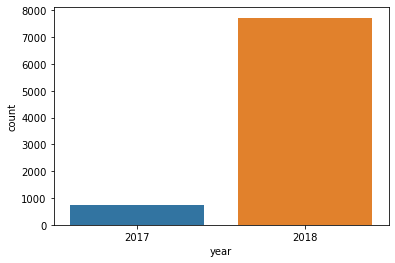

In [36]:
sb.countplot(data = df, x='year');
plt.title('')

Most of the data is recorded in 2018

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

- The distribution of the bikeCount seems to be exponential, which is ok as the higher number of rented bikes does not occure frequently. I performed square root transformation on it and it looked more like normal distribution.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

- The solarRadiation distribution was very dominated by zero values, so I made a new column to check if there is solar radiation or not (zero or not) and used this to plot the distribution of the solarRatiation without zero values and it seemed more clear to be exponential, as the low radiation is more common and higher radiation is less common in Seoul.

- The temperature distribution is pretty bimodal with two peaks around zero and 25 C.

- The count plot of years shows that most of the data is recorded in 2018 and small portion of it in 2017.


## Bivariate Exploration

Text(0.5, 1.0, '')

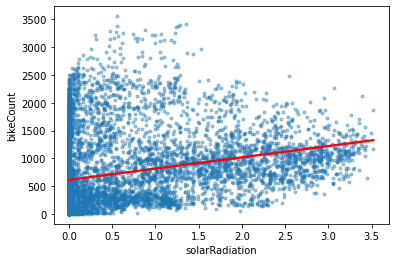

In [37]:
# solarRadiation vs bikeCount

sb.regplot(data=df, x='solarRadiation', y='bikeCount',
 marker='.', line_kws={'color':'red'}, scatter_kws={'alpha': 4/10})
plt.title('')


## The regression scatter plot of the solarRadiation shows a slight rising trend meaning that people tend to bike more in sunny days
## To clarify the trend I will categorize the column into four categories of intensity and plot them against bikeCount using box plots 

In [38]:
def categorize(d, col, n):
    df = d.copy()
    c = df[col]
    l = np.linspace(c.min(), c.max(), n+1)[1:]
    df[col+'_class'] = df[col]
    for i,j in enumerate(l):
        df[col+'_class'] = df[col+'_class'].map(lambda x:-1*i-1 if (x >= 0 and x <= j) else x)
    df[col+'_class'] = np.int8(np.abs(df[col+'_class']))
    return df

Text(0.5, 1.0, '')

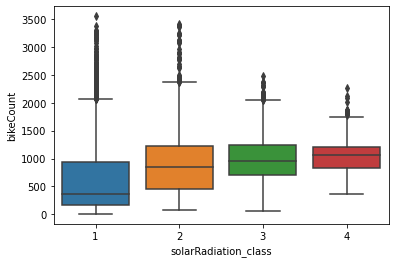

In [39]:
col = 'solarRadiation'
df1 = categorize(df, col, 4)
sb.boxplot(data=df1, x=col+'_class', y='bikeCount')
plt.title('')

## We can spot the same trend here, as people tend to bike more in sunny days.

Text(0.5, 1.0, '')

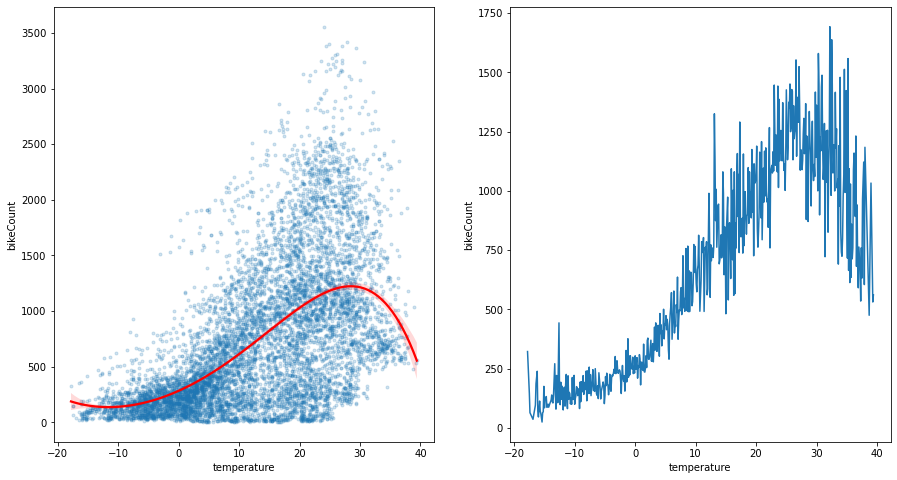

In [40]:
# temperature vs bikeCount

fig, axs = plt.subplots(1,2, figsize=(15,8))
sb.regplot(ax=axs[0], data=df, order=5 , x='temperature', y='bikeCount', 
marker='.', line_kws={'color':'red'}, scatter_kws={'alpha': 2/10})
plt.title('')
df.groupby('temperature')['bikeCount'].mean().plot(ax=axs[1], ylabel = 'bikeCount')
plt.title('')


There is a clear trend showing that the bike count increase with temperature and peaks around 30 'C and then drops. It is clear that people tend to bike in moderate temperature around 25 : 30 'C

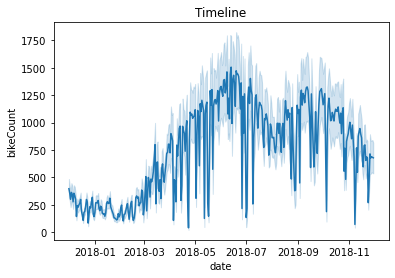

In [41]:
# date, year vs bikeCount

sb.lineplot(data=df, x='date', y='bikeCount', sort=True);
plt.title('Timeline');

Text(0.5, 1.0, '')

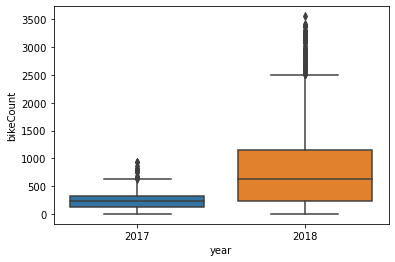

In [42]:
sb.boxplot(data=df, x='year', y='bikeCount');
plt.title('')


- From the Timeline graph we can see a general increasing in biking during 2017 and the first half of 2018, then the demand decreased through the second half of 2018

- In general, the demand on bike rents in 2018 is about the doouble of the demand in 2017 as shown in the box plot

Text(0.5, 1.0, 'Number of rented bikes share per season in 2018')

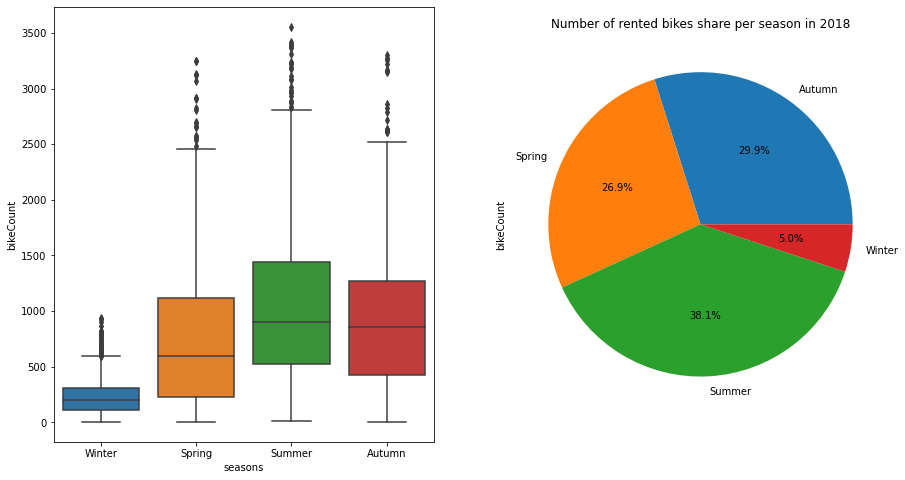

In [43]:
# bikeCount vs. seasons and months

fig, axs = plt.subplots(1,2, figsize=(15,8))
sb.boxplot(ax = axs[0], data=df, x='seasons', y='bikeCount')
plt.title('')

df[df.year==2018].groupby('seasons').sum()['bikeCount'].plot.pie(ax=axs[1], autopct='%1.1f%%')
plt.title("Number of rented bikes share per season in 2018")

Text(0.5, 1.0, '')

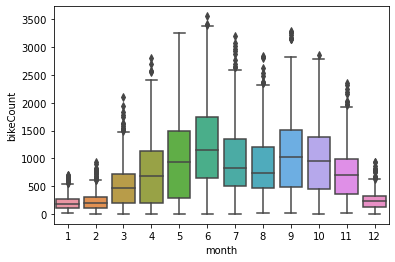

In [44]:
sb.boxplot(data=df, x='month', y='bikeCount')
plt.title('')


- We can clearly see from seasons and months that the most bike rents happen in summer and the least happen in winter.

- 2017 records are all in winter, so I excluded it from the pie chart and drew only 2018 records which shows the portion of each season, summer has the largest bike rents with 38.1%, winter is the least with only 5%, spring and autumn are 26.9% and 29.9% respectively.

Text(0.5, 1.0, '')

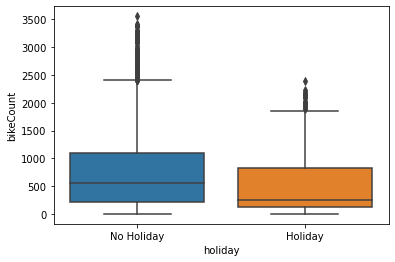

In [45]:
sb.boxplot(data=df, x='holiday', y='bikeCount')
plt.title('')


Text(0.5, 1.0, '')

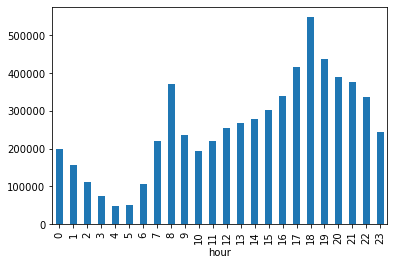

In [46]:
df.groupby('hour').sum()['bikeCount'].plot.bar()
plt.title('')


### Needless to say that people tend to bike more in working days (no holiday) as they go to and from work as shown in the previous box plot.

Text(0.5, 1.0, '')

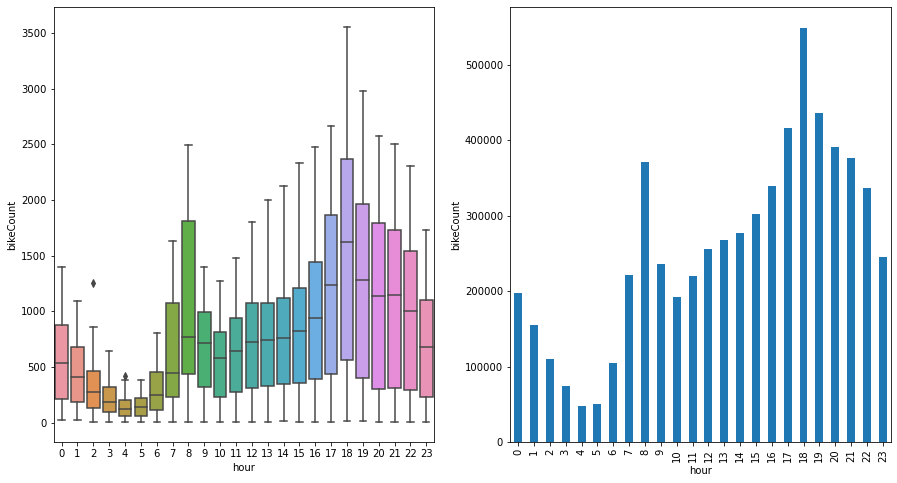

In [47]:
# hour vs bikeCount

fig, axs = plt.subplots(1,2, figsize=(15,8))

sb.boxplot(ax=axs[0], data=df, x='hour', y='bikeCount')
plt.title('')

df.groupby('hour').sum()['bikeCount'].plot.bar(ax=axs[1], ylabel='bikeCount')
plt.title('')


## From the previos box plots of hours vs bikes count we can spot two peaks, one at 8 am and the other at about 18 (6 pm) which are the hours of going to work and going back home.

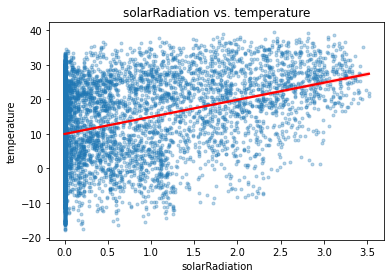

In [62]:
sb.regplot(data=df, x='solarRadiation', y='temperature', 
marker='.', line_kws={'color':'red'}, scatter_kws={'alpha': 3/10}).set_title('solarRadiation vs. temperature');


Text(0.5, 1.0, 'months vs. solarRadiation')

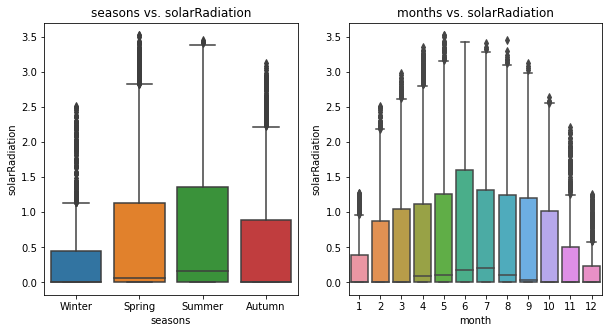

In [58]:
fig, axs = plt.subplots(1,2, figsize=(10,5))

sb.boxplot(ax=axs[0] ,data=df, x='seasons', y='solarRadiation').set_title('seasons vs. solarRadiation')
sb.boxplot(ax=axs[1] ,data=df, x='month', y='solarRadiation').set_title('months vs. solarRadiation')


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- There is a direct relation between solar radiation and bike count as people tend to bike more in sunny days.
- The bikes count increase with temperature up to about 30 degrees C then the count decreases again with high temperature above 30 degrees.
- From the timeline througth 2017 and the first half of 2018 we can see increasing of bikes count, but then it decreases at the end of 2018. This cyclic effect is affected mainly by the season during the year as I will explain later, but in general, from the box plot of years vs bike counts we can see that 2018 had more bike rents than 2017.
- We can clearly see from seasons and months that the most bike rents happen in summer and the least happen in winter.
- 2017 records are all in winter, so I excluded it from the pie chart and drew only 2018 records which shows the portion of each season, summer has the largest bike rents with 38.1%, winter is the least with only 5%, spring and autumn are 26.9% and 29.9% respectively.
- Needless to say that people tend to bike more in working days (no holiday) as they go to and from work as shown in the previous box plot.
- From the plots of hours vs bikes count we can spot two peaks, one at 8 am and the other at about 18 (6 pm) which are the hours of going to work and going back home.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

- There is a clear direct relation between solar radiation and temperature.
- Both solar radiation and temperature change periodically with months and seasons, the peak of them is at summer (month 6 and 7) and the bottom is at winter (month 12 and 1)

## Multivariate Exploration


Text(0.5, 1.0, 'aaa')

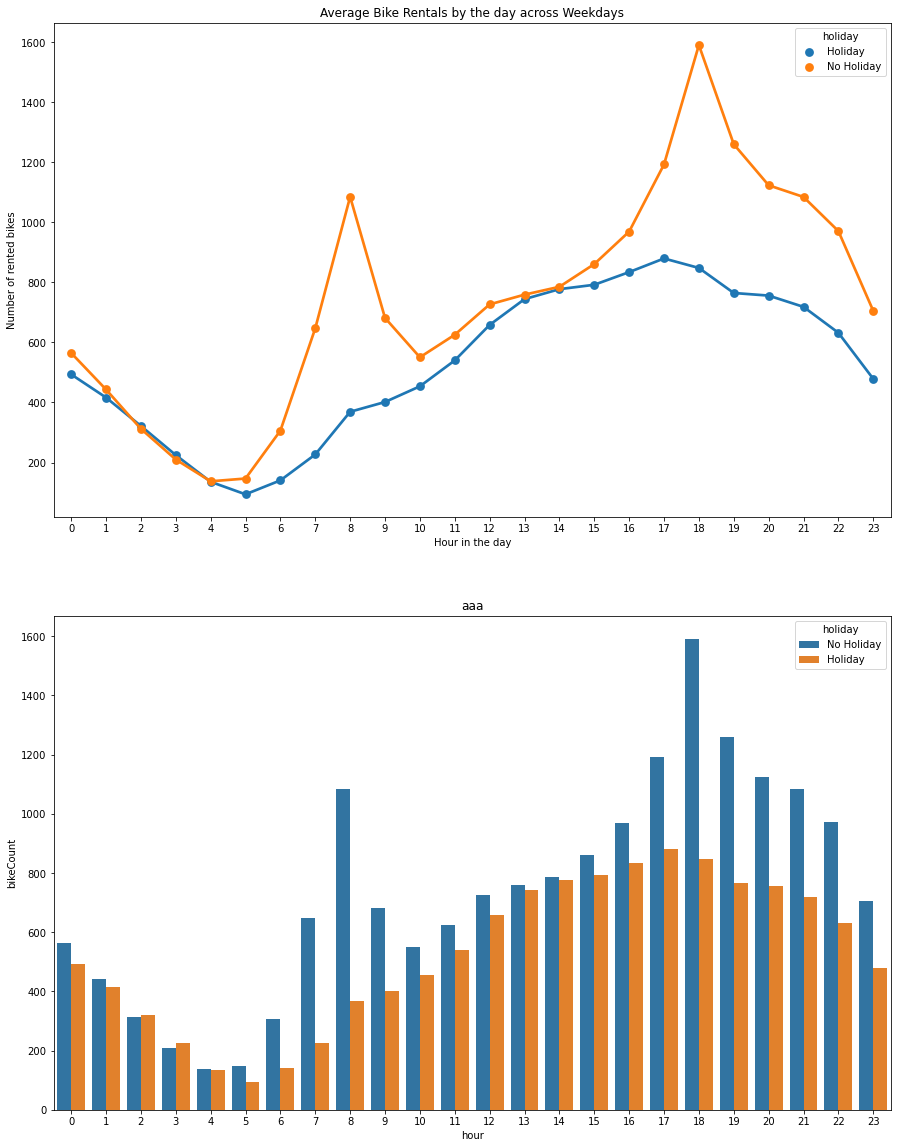

In [53]:
# hour, holiday & count

fig, axs = plt.subplots(2,1, figsize=(15,20))
group_day_hour = pd.DataFrame(df.groupby(['holiday', 'hour'])['bikeCount'].mean()).reset_index()
p = sb.pointplot(ax=axs[0], data=group_day_hour, x='hour', y='bikeCount', hue='holiday')
p.set(xlabel='Hour in the day', ylabel='Number of rented bikes', title='Average Bike Rentals by the day across Weekdays')
sb.barplot(ax=axs[1], x="hour", y="bikeCount", hue="holiday", data=df, ci=None)
plt.title('aaa')


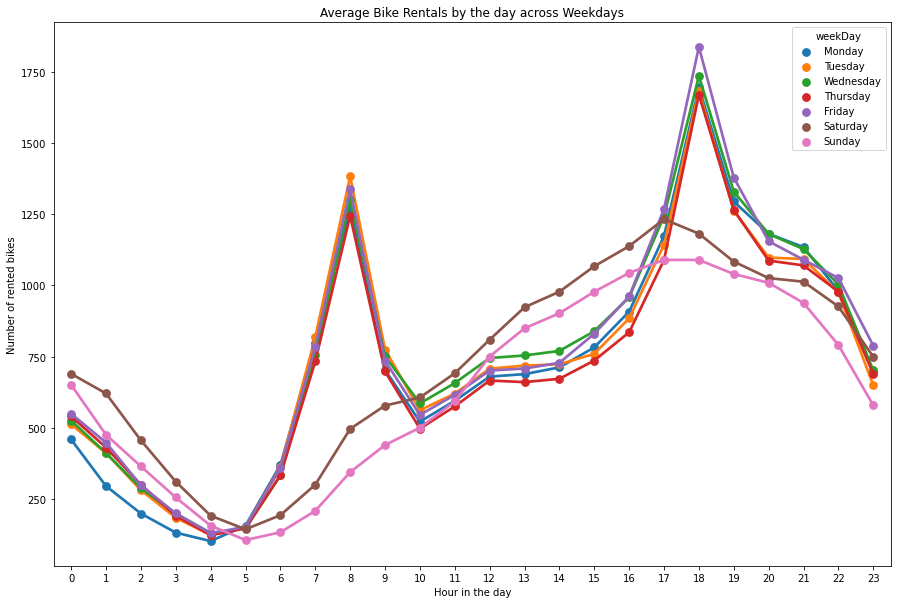

In [51]:
# hour, weekDay & count

plt.figure(figsize=(15, 10))
hue_order= ['Monday', 'Tuesday', 'Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']
group_day_hour = pd.DataFrame(df.groupby(['weekDay', 'hour'])['bikeCount'].mean()).reset_index()
p = sb.pointplot(data=group_day_hour, x='hour', y='bikeCount', hue='weekDay', hue_order=hue_order)
p.set(xlabel='Hour in the day', ylabel='Number of rented bikes', 
title='Average Bike Rentals by the day across Weekdays');

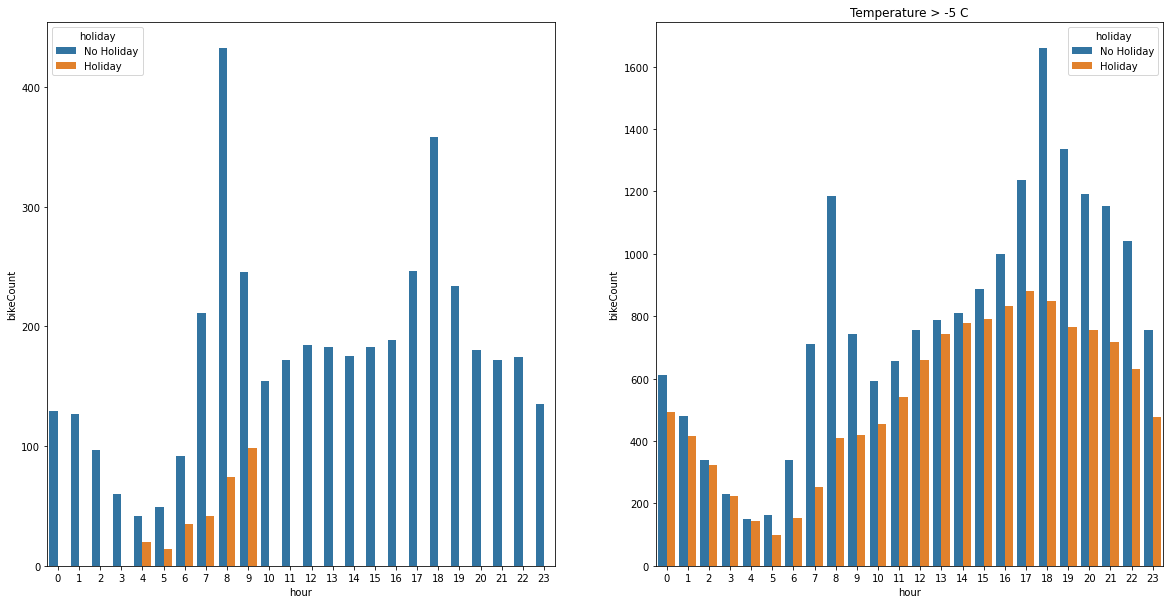

In [52]:
# hour, holiday, count & temperature

fig, axs = plt.subplots(1,2, figsize=(20,10))

sb.barplot(ax=axs[0], x="hour", y="bikeCount", hue="holiday", data=df[df.temperature < -5], ci=None)
plt.title('Temperature < -5 C')
sb.barplot(ax=axs[1], x="hour", y="bikeCount", hue="holiday", data=df[df.temperature >= -5], ci=None)
plt.title('Temperature > -5 C');


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

- From the first two plots of relating hour, count and holiday we can see two different trends. In normal working days we have two peaks at 8 am and 6 pm as people go to work and return home in these two periods, but in holidays, there is no peak at 8 am as people get up late and the bike count trend increases gently as the day go on and peaks in the late afternoon at about 5 pm.
- The same trends can be spotted at the week days, in the working days from Monday to Friday the trend has two peaks at the two rush hours 8 am and 6 pm, but in Saturday and Sunday the trend is pretty smooth with one peak at 5 pm as people do not have to get up early to go to work.
### Were there any interesting or surprising interactions between features?

- An interesting iteraction was in the last two figures, even at very low temperatures < 5 C people o Seoul ride bikes to work and from work like any normal day, which appears in the two peaks at the two rush hours if there is no holiday.
- The more interesting is that even in holidays when temperature is very low below 5 C, some people still ride bikes in the morning.